# Analyzing Playbill Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [5]:
grosses = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-28/grosses.csv')
synopses = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-28/synopses.csv')
cpi = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-28/cpi.csv')
pre_1985_starts = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-28/pre-1985-starts.csv')


In [6]:
grosses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47524 entries, 0 to 47523
Data columns (total 14 columns):
week_ending             47524 non-null object
week_number             47524 non-null int64
weekly_gross_overall    47524 non-null float64
show                    47524 non-null object
theatre                 47524 non-null object
weekly_gross            47524 non-null float64
potential_gross         34911 non-null float64
avg_ticket_price        47524 non-null float64
top_ticket_price        36167 non-null float64
seats_sold              47524 non-null int64
seats_in_theatre        47524 non-null int64
pct_capacity            47524 non-null float64
performances            47524 non-null int64
previews                47524 non-null int64
dtypes: float64(6), int64(5), object(3)
memory usage: 5.1+ MB


In [9]:
grosses['week_ending'] = pd.to_datetime(grosses['week_ending'])

In [11]:
grosses.head()

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews
0,1985-06-09,1,3915937.0,42nd Street,St. James Theatre,282368.0,NaN,30.42,NaN,9281,1655,0.7010,8,0
1,1985-06-09,1,3915937.0,A Chorus Line,Sam S. Shubert Theatre,222584.0,NaN,27.25,NaN,8167,1472,0.6935,8,0
2,1985-06-09,1,3915937.0,Aren't We All?,Brooks Atkinson Theatre,249272.0,NaN,33.75,NaN,7386,1088,0.8486,8,0
3,1985-06-09,1,3915937.0,Arms and the Man,Circle in the Square Theatre,95688.0,NaN,20.87,NaN,4586,682,0.8405,8,0
4,1985-06-09,1,3915937.0,As Is,Lyceum Theatre,61059.0,NaN,20.78,NaN,2938,684,0.5369,8,0


# Weekly Grosses Over Time

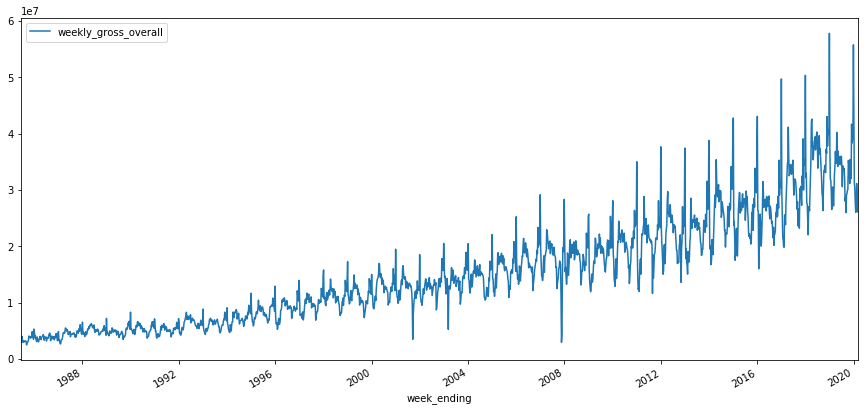

In [33]:
fig, ax = plt.subplots(figsize = (15,7))
grosses[['week_ending', 'weekly_gross_overall']].groupby('week_ending').max().plot(ax = ax)